#### 5Q2. Consider only the below columns and prepare a prediction model for predicting Price.

Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]


In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm


In [2]:
data= pd.read_csv("ToyotaCorolla.csv", encoding='latin1')

In [3]:
data1=data[['Price','Age_08_04' ,"KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
data1.rename(columns={'Age_08_04':'Age'}, inplace=True)
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age            1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


C:\Users\SARAN\anaconda3\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [4]:
data1.head()

,Price,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [5]:
data1.corr() #less correlation with Gears, CC, Doors, Quaterly_Tax, HP.
# autocorrelation btw age~KM, age~Weight, Weight~Quaterly_Tax

,Price,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


#### Scatterplot between variables along with histograms

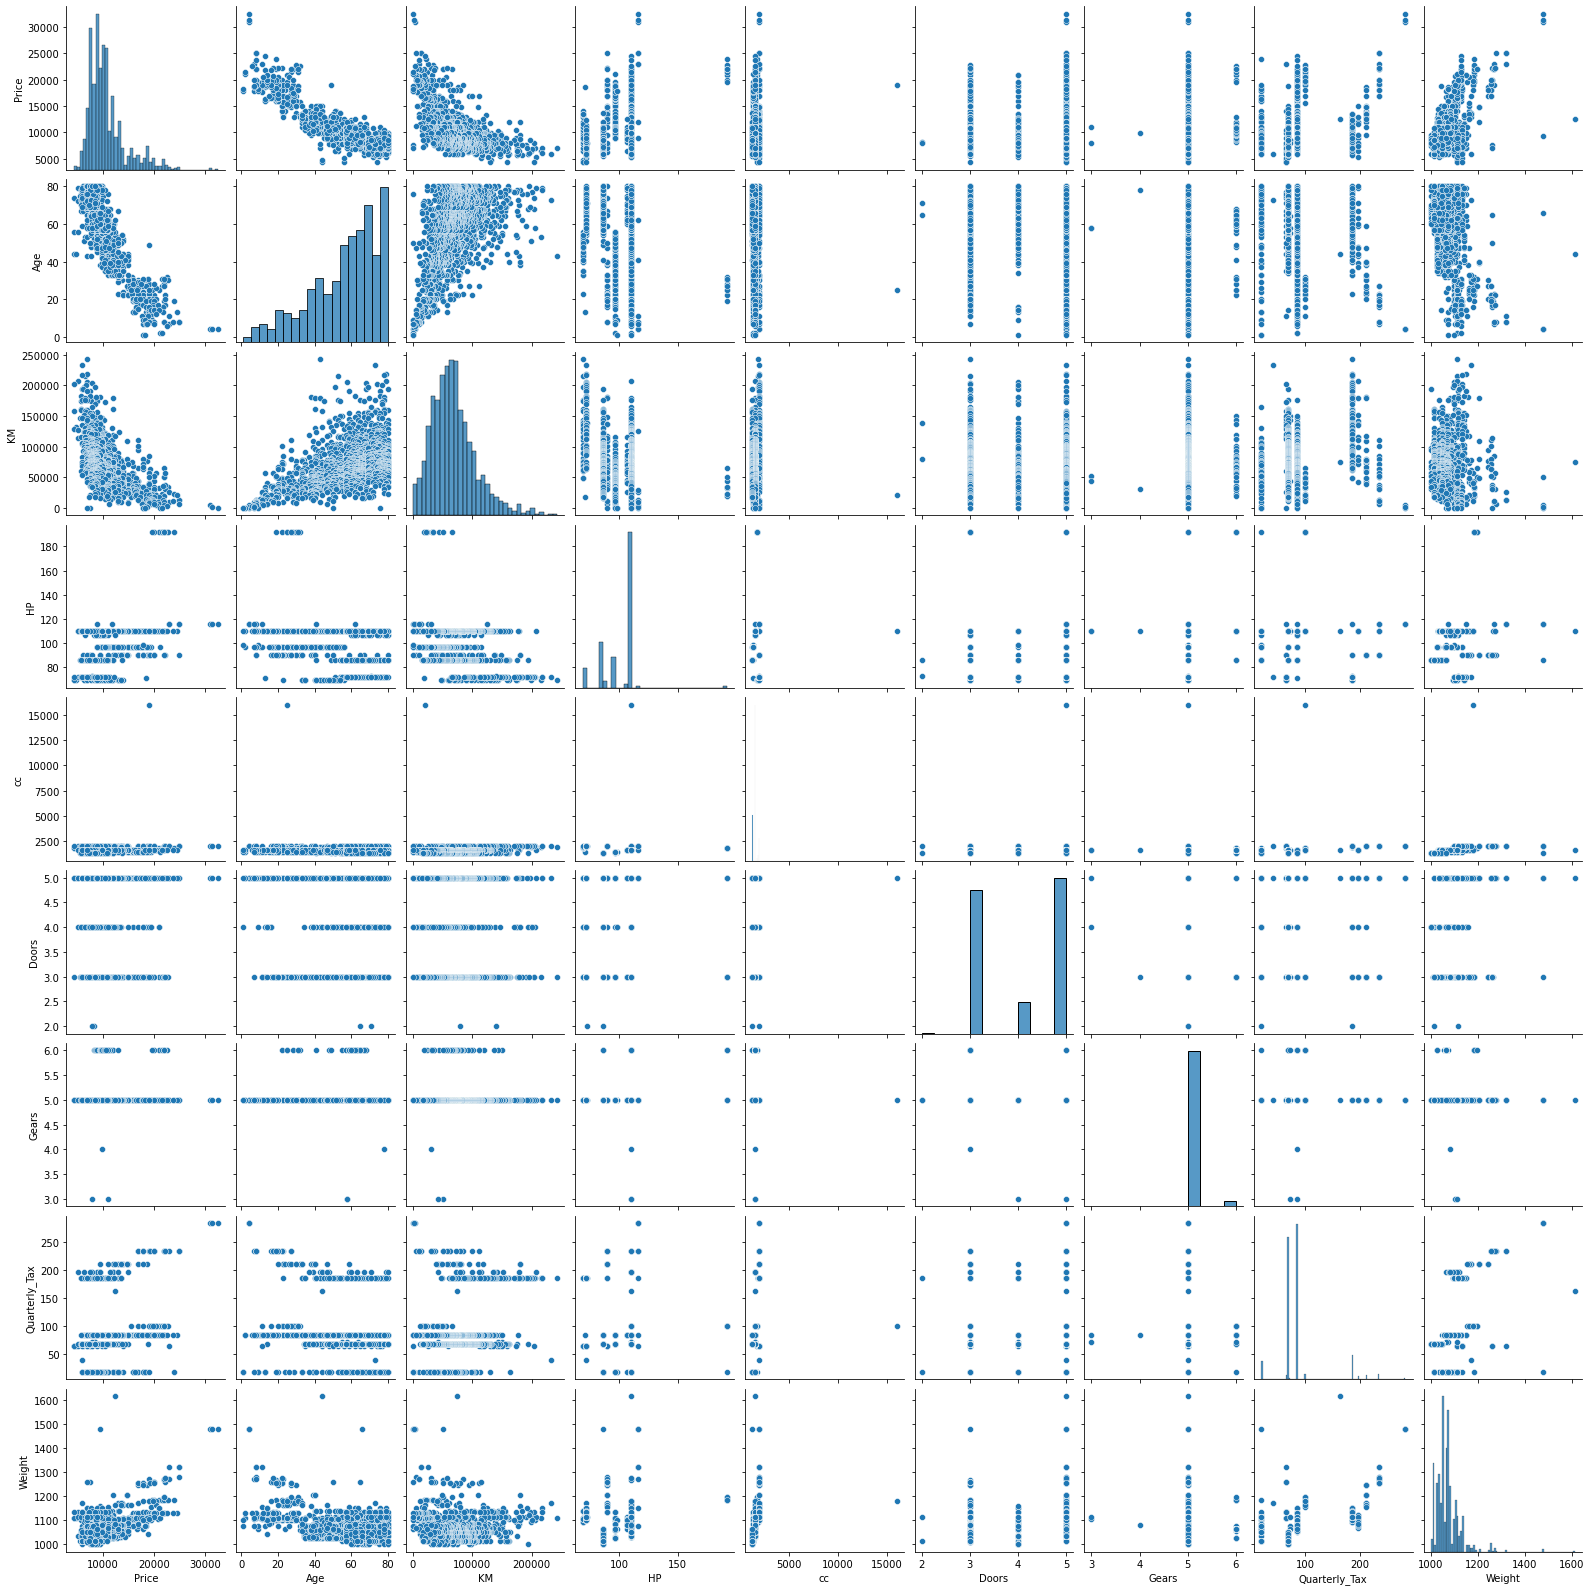

In [6]:
sns.pairplot(data1)

### Build model and Train model

In [7]:
model=smf.ols('Price~Age+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight' , data=data1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Wed, 30 Jun 2021   Prob (F-statistic):               0.00
Time:                        12:08:59   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
Age            -121.6584      2.616    -46.512      0.000    -126.789    -116.527
KM               -0.0208      0.001    -16.622      0.000      -0.023      -0.018
HP               31.6809      2.818     11.241      0.000      26.152      37.209
cc               -0.1211      0.090     -1.344      0.179      -0.298       0.056
Doors            -1.6166     40.006     -0.040      0.968     -80.093      76.859
Gears           594.3199    197.055      3.016      0.003     207.771     980.869
Quarterly_Tax     3.9491      1.310      3.015      0.003       1.379       6.519
Weight           16.9586      1.068     15.880      0.000      14.864      19.054
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Simple Linear Regression Models

In [8]:
m1=smf.ols('Price~Age', data=data1).fit()
m1.pvalues

Intercept    0.0
Age          0.0
dtype: float64

In [9]:
m2=smf.ols('Price~KM', data=data1).fit()
m2.pvalues

Intercept     0.000000e+00
KM           1.757913e-124
dtype: float64

In [10]:
m3=smf.ols('Price~HP', data=data1).fit()
m3.pvalues

Intercept    1.725695e-06
HP           1.926234e-34
dtype: float64

In [11]:
m4=smf.ols('Price~Gears', data=data1).fit()
m4.pvalues

Intercept    0.069804
Gears        0.016775
dtype: float64

In [12]:
m4=smf.ols('Price~Quarterly_Tax', data=data1).fit()
m4.pvalues

Intercept        1.532168e-246
Quarterly_Tax     4.407393e-17
dtype: float64

In [13]:
m4=smf.ols('Price~Weight', data=data1).fit()
m4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.337
Method:                 Least Squares   F-statistic:                     731.5
Date:                Wed, 30 Jun 2021   Prob (F-statistic):          1.63e-130
Time:                        12:09:00   Log-Likelihood:                -13511.
No. Observations:                1436   AIC:                         2.703e+04
Df Residuals:                    1434   BIC:                         2.704e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.222e+04   1589.807    -20.264      0.000   -3.53e+04   -2.91e+04
Weight        40.0444      1.481     27.046      0.000      37.140      42.949
==============================================================================
Omnibus:                      105.784   Durbin-Watson:                   0.562
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              531.408
Skew:                           0.028   Prob(JB):                    4.04e-116
Kurtosis:                       5.980   Cond. No.                     2.19e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.19e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
m5=smf.ols('Price~Age+KM+HP+Gears+Quarterly_Tax+Weight', data=data1).fit()

m5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1508.
Date:                Wed, 30 Jun 2021   Prob (F-statistic):               0.00
Time:                        12:09:00   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1429   BIC:                         2.480e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5478.4778   1408.562     -3.889      0.000   -8241.548   -2715.407
Age            -121.6999      2.615    -46.534      0.000    -126.830    -116.570
KM               -0.0209      0.001    -16.769      0.000      -0.023      -0.018
HP               31.3269      2.799     11.191      0.000      25.836      36.818
Gears           598.9653    193.441      3.096      0.002     219.507     978.424
Quarterly_Tax     3.7371      1.296      2.883      0.004       1.194       6.280
Weight           16.7251      1.020     16.393      0.000      14.724      18.726
==============================================================================
Omnibus:                      147.966   Durbin-Watson:                   1.540
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              966.959
Skew:                          -0.207   Prob(JB):                    1.07e-210
Kurtosis:                       6.999   Cond. No.                     3.12e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.12e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
m6=smf.ols('Price~Age+KM+HP+Gears+Quarterly_Tax', data=data1).fit()
m6.summary()
#Age+Weight+KM+Quarterly_Tax

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     1479.
Date:                Wed, 30 Jun 2021   Prob (F-statistic):               0.00
Time:                        12:09:00   Log-Likelihood:                -12500.
No. Observations:                1436   AIC:                         2.501e+04
Df Residuals:                    1430   BIC:                         2.504e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.135e+04   1050.796     10.803      0.000    9289.988    1.34e+04
Age            -137.5635      2.647    -51.963      0.000    -142.757    -132.370
KM               -0.0197      0.001    -14.535      0.000      -0.022      -0.017
HP               45.7220      2.896     15.787      0.000      40.041      51.403
Gears           459.3703    210.568      2.182      0.029      46.314     872.427
Quarterly_Tax    16.9746      1.105     15.363      0.000      14.807      19.142
==============================================================================
Omnibus:                      210.953   Durbin-Watson:                   1.376
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              740.743
Skew:                           0.698   Prob(JB):                    1.41e-161
Kurtosis:                       6.230   Cond. No.                     2.16e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.16e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
m7=smf.ols('Price~Age+KM+HP+Gears+Weight', data=data1).fit()
m7.summary()
#Age+Weight+KM+Quarterly_Tax

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1798.
Date:                Wed, 30 Jun 2021   Prob (F-statistic):               0.00
Time:                        12:09:01   Log-Likelihood:                -12381.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1430   BIC:                         2.480e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -7006.8272   1308.322     -5.356      0.000   -9573.263   -4440.391
Age         -122.2437      2.615    -46.745      0.000    -127.374    -117.114
KM            -0.0200      0.001    -16.551      0.000      -0.022      -0.018
HP            28.2829      2.599     10.882      0.000      23.184      33.381
Gears        631.5435    193.604      3.262      0.001     251.766    1011.321
Weight        18.5574      0.800     23.192      0.000      16.988      20.127
==============================================================================
Omnibus:                      198.155   Durbin-Watson:                   1.564
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1550.366
Skew:                          -0.376   Prob(JB):                         0.00
Kurtosis:                       8.034   Cond. No.                     2.89e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.89e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Final model Price~Age+KM+HP+Weight

In [17]:
fn_model=smf.ols('Price~Age+KM+HP+Weight', data=data1).fit()
fn_model.summary()
#Age+Weight+KM+Quarterly_Tax

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     2230.
Date:                Wed, 30 Jun 2021   Prob (F-statistic):               0.00
Time:                        12:09:01   Log-Likelihood:                -12386.
No. Observations:                1436   AIC:                         2.478e+04
Df Residuals:                    1431   BIC:                         2.481e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4014.6418    936.044     -4.289      0.000   -5850.808   -2178.476
Age         -122.4245      2.623    -46.668      0.000    -127.570    -117.278
KM            -0.0196      0.001    -16.271      0.000      -0.022      -0.017
HP            30.2119      2.539     11.897      0.000      25.230      35.193
Weight        18.5319      0.803     23.084      0.000      16.957      20.107
==============================================================================
Omnibus:                      197.115   Durbin-Watson:                   1.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1498.712
Skew:                          -0.384   Prob(JB):                         0.00
Kurtosis:                       7.946   Cond. No.                     2.05e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.05e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Calculating VIF value

In [18]:
rsq_age=smf.ols('Age~KM+HP+Weight', data=data1).fit().rsquared
rsq_km=smf.ols('KM~Age+HP+Weight', data=data1).fit().rsquared
rsq_hp=smf.ols('HP~KM+Age+Weight', data=data1).fit().rsquared
rsq_weight=smf.ols('Weight~KM+Age+HP', data=data1).fit().rsquared

age_vif=1/(1-rsq_age)
km_vif=1/(1-rsq_km)
hp_vif=1/(1-rsq_hp)
weight_vif=1/(1-rsq_weight)

In [19]:
vif=pd.DataFrame({'variables':['age','km','hp','weight'] ,'vif':[age_vif,km_vif,hp_vif,weight_vif]})
vif

,variables,vif
0,age,1.873690
1,km,1.614165
2,hp,1.139033
3,weight,1.405564


#### Residual Analysis

#### Test For normality of Residuals

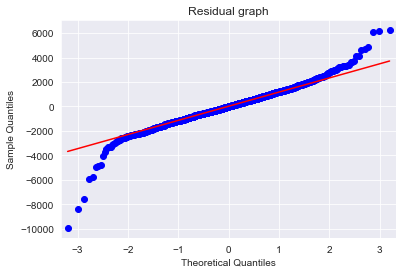

In [20]:
sns.set_style(style='darkgrid')
qqplot=sm.qqplot(fn_model.resid, line='q')
plt.title("Residual graph")
plt.show()

In [21]:
list(np.where(fn_model.resid>4000))
#fn_model.resid.head()

[array([ 109,  110,  111,  125,  147,  171,  523, 1058], dtype=int64)]

In [22]:
list(np.where(fn_model.resid< -4000))

[array([191, 192, 221, 393, 402, 601, 654, 960, 991], dtype=int64)]

#### Residual Plot for Homoscedasticity

In [23]:
def get_standardized_values(val):
    values = ((val-val.mean())/val.std())
    return(values)

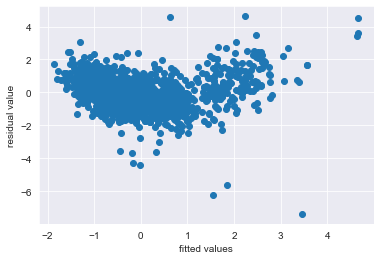

In [24]:
plt.scatter(get_standardized_values(fn_model.fittedvalues), get_standardized_values(fn_model.resid))
plt.xlabel('fitted values')
plt.ylabel('residual value')
plt.show()

#### Residual vs regressions

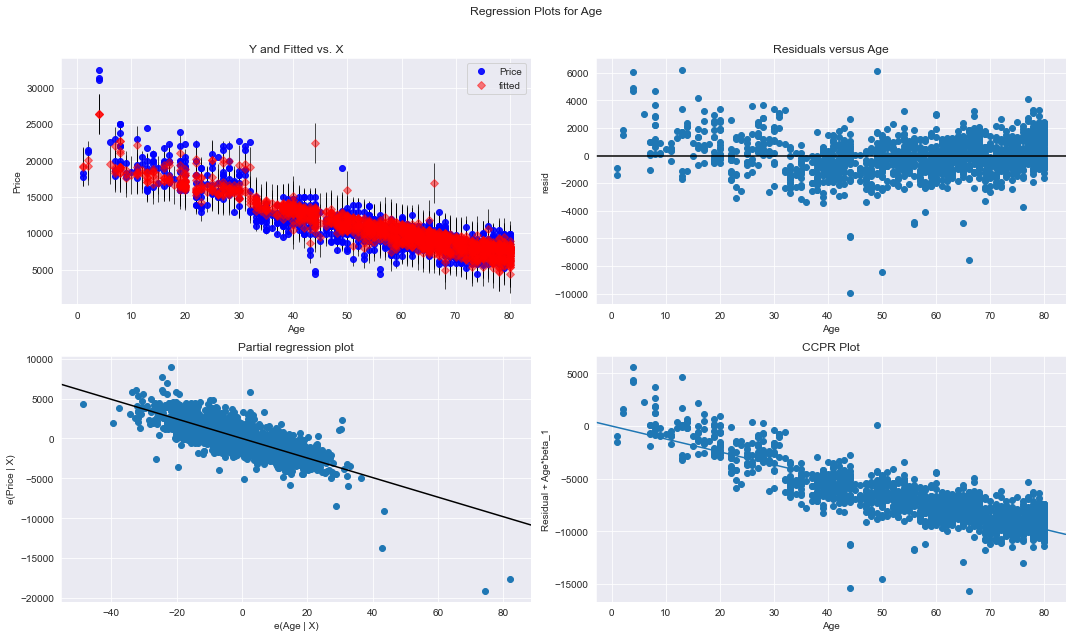

In [25]:
fig= plt.figure(figsize=(15,9))
sm.graphics.plot_regress_exog(fn_model, 'Age', fig=fig)
plt.show()

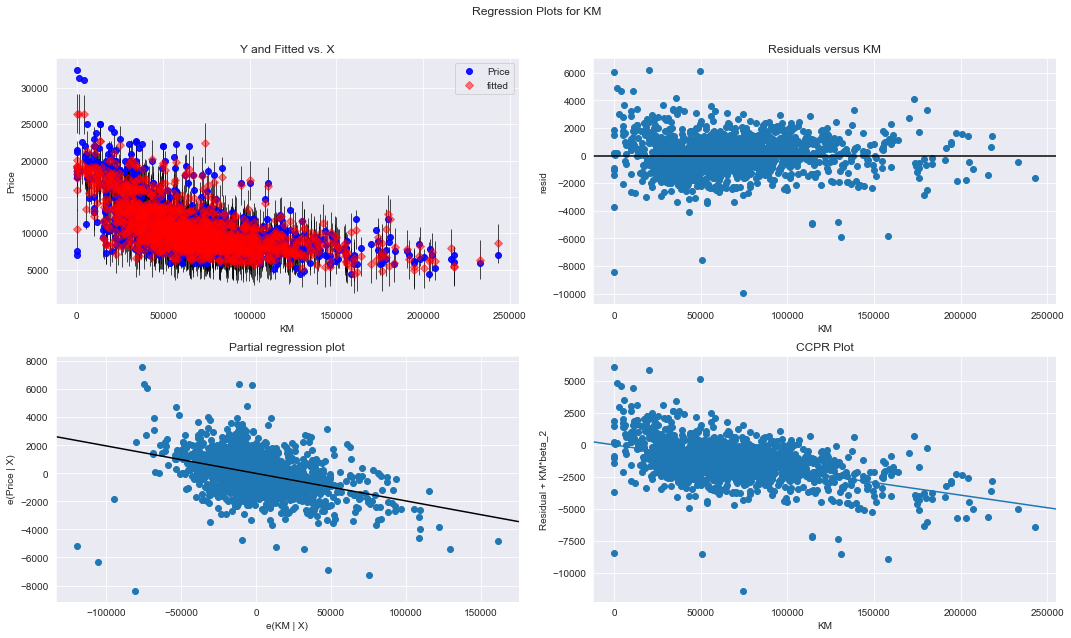

In [26]:
fig= plt.figure(figsize=(15,9))
fig=sm.graphics.plot_regress_exog(fn_model, 'KM', fig)

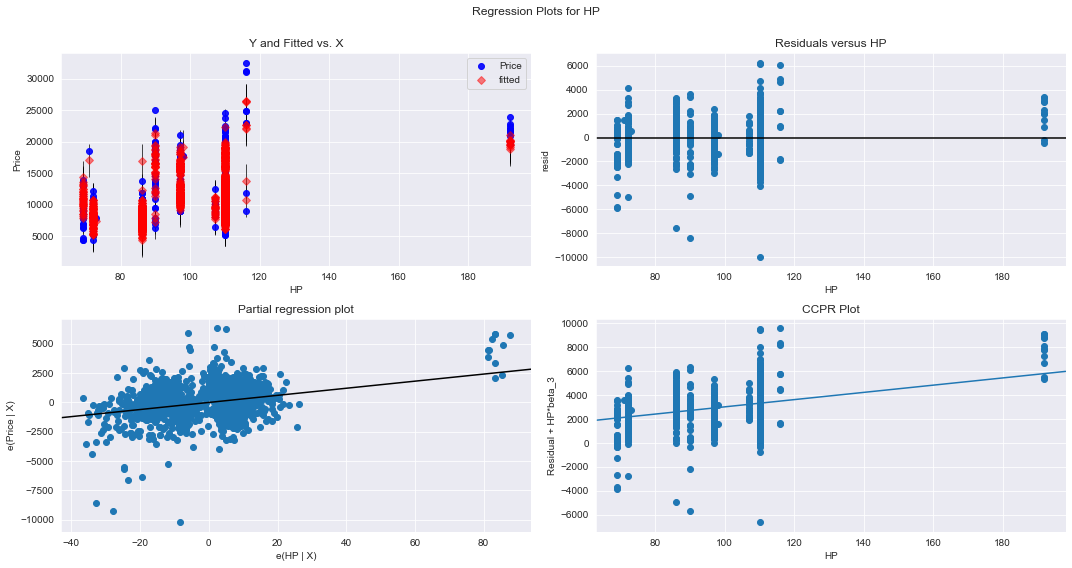

In [27]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(fn_model, 'HP', fig)

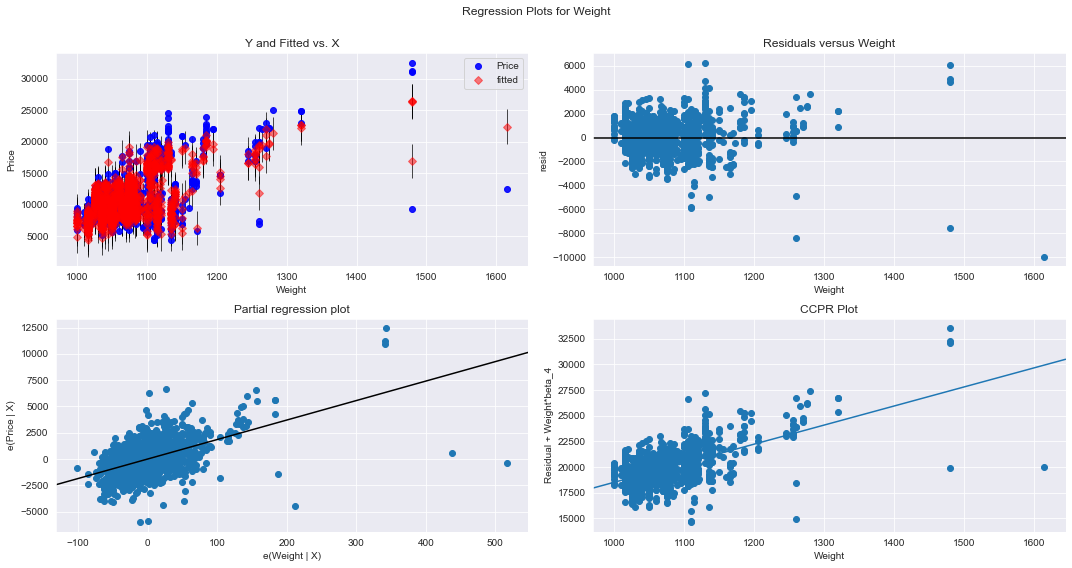

In [28]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(fn_model, 'Weight', fig)

#### Cooks distance

In [29]:
model_influence=fn_model.get_influence()
(c,_)=model_influence.cooks_distance


In [30]:
np.argmax(c), np.max(c)

(221, 1.2699400109580752)

In [31]:
k=data1.shape[1]
n=data1.shape[0]
leverage_cutoff= 3*((k+1)/n)
print(k,n)
print(leverage_cutoff)

9 1436
0.020891364902506964


<StemContainer object of 3 artists>

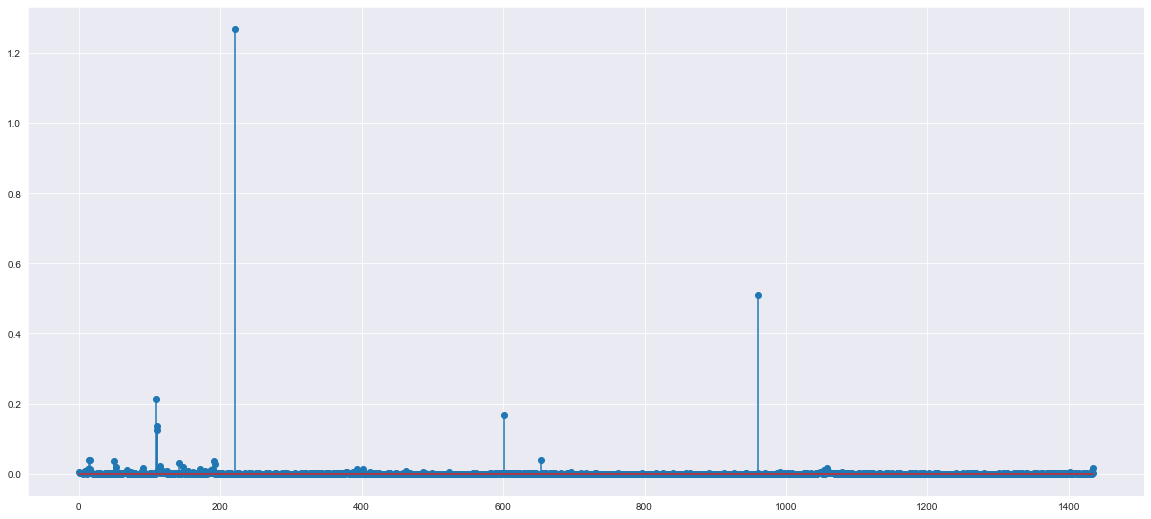

In [32]:
plt.figure(figsize=(20,9))
plt.stem(np.arange(len(data1)), np.round(c,3))

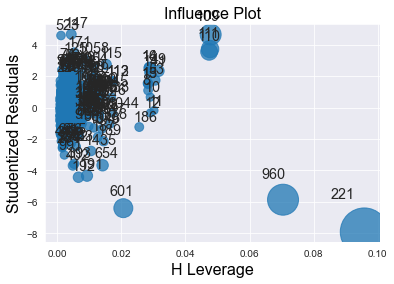

In [33]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(fn_model)
plt.show()

In [34]:
data1[data1.index.isin([221,960])]

,Price,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
221,12450,44,74172,110,1600,5,5,163,1615
960,9390,66,50806,86,1300,3,5,19,1480


In [35]:
data1.tail()

,Price,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015
1435,6950,76,1,110,1600,5,5,19,1114


In [36]:
fn_data=data1.drop(data1.index[[221,960]],axis=0).reset_index()
#fn_data.head()
fn_data1=fn_data.drop(columns=['index','cc','Doors','Gears','Quarterly_Tax'])
fn_data1.shape


(1434, 5)

In [37]:
fn_data1

,Price,Age,KM,HP,Weight
0,13500,23,46986,90,1165
1,13750,23,72937,90,1165
2,13950,24,41711,90,1165
3,14950,26,48000,90,1165
4,13750,30,38500,90,1170
...,...,...,...,...,...
1429,7500,69,20544,86,1025
1430,10845,72,19000,86,1015
1431,8500,71,17016,86,1015
1432,7250,70,16916,86,1015


#### Final model without outliers

In [38]:
fn_model1=smf.ols('Price~Age+KM+HP+Weight', data=fn_data1).fit()
fn_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     2425.
Date:                Wed, 30 Jun 2021   Prob (F-statistic):               0.00
Time:                        12:09:13   Log-Likelihood:                -12317.
No. Observations:                1434   AIC:                         2.464e+04
Df Residuals:                    1429   BIC:                         2.467e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -7912.0770    976.375     -8.104      0.000   -9827.360   -5996.794
Age         -116.2934      2.599    -44.754      0.000    -121.391    -111.196
KM            -0.0213      0.001    -18.097      0.000      -0.024      -0.019
HP            28.7916      2.455     11.730      0.000      23.977      33.607
Weight        22.0984      0.846     26.124      0.000      20.439      23.758
==============================================================================
Omnibus:                      122.446   Durbin-Watson:                   1.618
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              622.478
Skew:                          -0.201   Prob(JB):                    6.77e-136
Kurtosis:                       6.203   Cond. No.                     2.22e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.22e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<StemContainer object of 3 artists>

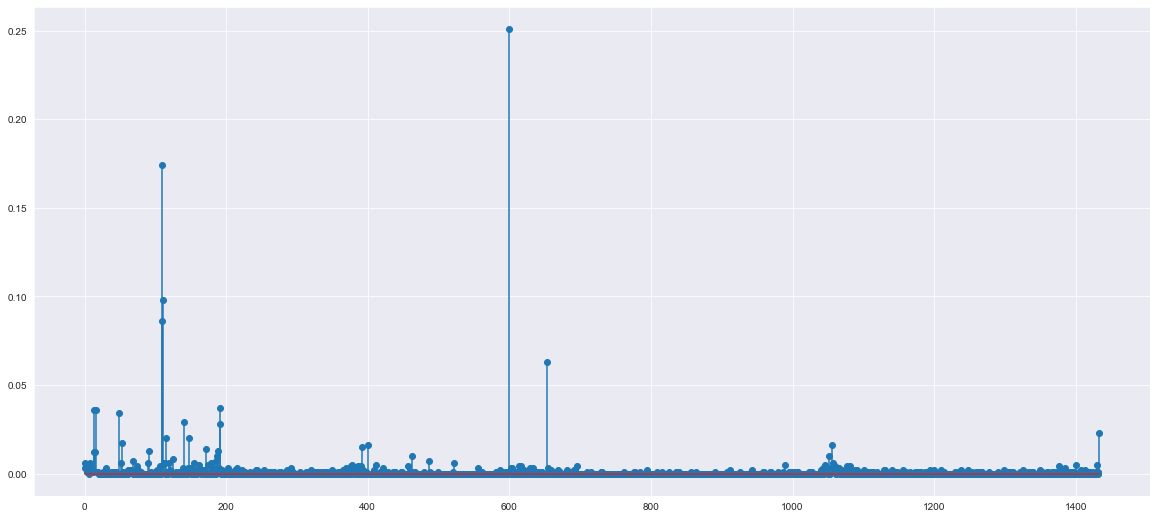

In [39]:
# Cooks distance
model1_influence=fn_model1.get_influence()
(c1,_)=model1_influence.cooks_distance
plt.figure(figsize=(20,9))
plt.stem(np.arange(len(fn_data1)), np.round(c1,3))

#### High influence point

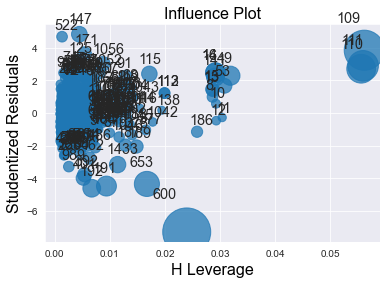

In [40]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(fn_model1)
plt.show()

#### New Data Prediction

In [41]:
#New data for prediction
p_data1=pd.DataFrame({'Age':20,'KM':56000,'HP':200,'Weight':1200}, index=[1])
p_data1

,Age,KM,HP,Weight
1,20,56000,200,1200


In [42]:
fn_model1.predict(p_data1)

1    20846.82805
dtype: float64

In [43]:
fn_model1.predict(fn_data1.iloc[0:5,])

0    16749.232919
1    16197.046132
2    16745.181249
3    16378.776752
4    16226.236434
dtype: float64

In [44]:
predicted_price=fn_model1.predict(fn_data1)
fn_data1['predicted_price']= pd.Series(predicted_price)
fn_data1


,Price,Age,KM,HP,Weight,predicted_price
0,13500,23,46986,90,1165,16749.232919
1,13750,23,72937,90,1165,16197.046132
2,13950,24,41711,90,1165,16745.181249
3,14950,26,48000,90,1165,16378.776752
4,13750,30,38500,90,1170,16226.236434
...,...,...,...,...,...,...
1429,7500,69,20544,86,1025,8753.434066
1430,10845,72,19000,86,1015,8216.423578
1431,8500,71,17016,86,1015,8374.932644
1432,7250,70,16916,86,1015,8493.353856


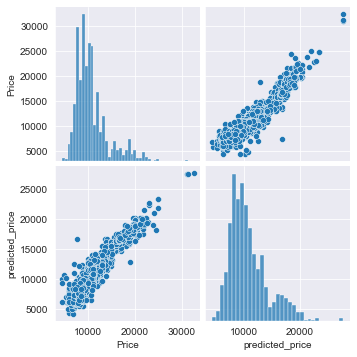

In [45]:
sns.pairplot(fn_data1[['Price','predicted_price']]) #Almost linear. so Values are predicted almost correctly. 